In [6]:
import pandas as pd
import numpy as np

In [38]:
path = 'C:/Users/DEVENDRA/Desktop/ml_database_7/car.csv'
df1 = pd.read_csv(path)

In [42]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
df =df1

In [5]:
cate_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [8]:
for i in cate_feature:
    print(i, len(np.unique(df[i])))

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [11]:
is_null_feat = [feature for feature in df.columns if df[feature].isnull().sum()>1]

In [14]:
is_null_feat

[]

In [13]:
for i in is_null_feat:
    print(i,np.round(df[i].isnull().sum(), 4))

In [43]:
df['no_of_yr'] = 2020-df['Year']

In [44]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_yr
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [45]:
df.drop(['Year'], axis = 1, inplace = True)

In [48]:
df.drop(['Car_Name'], axis = 1, inplace = True)

In [49]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_yr
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [50]:
df = pd.get_dummies(df, drop_first=True)

In [69]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_yr,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

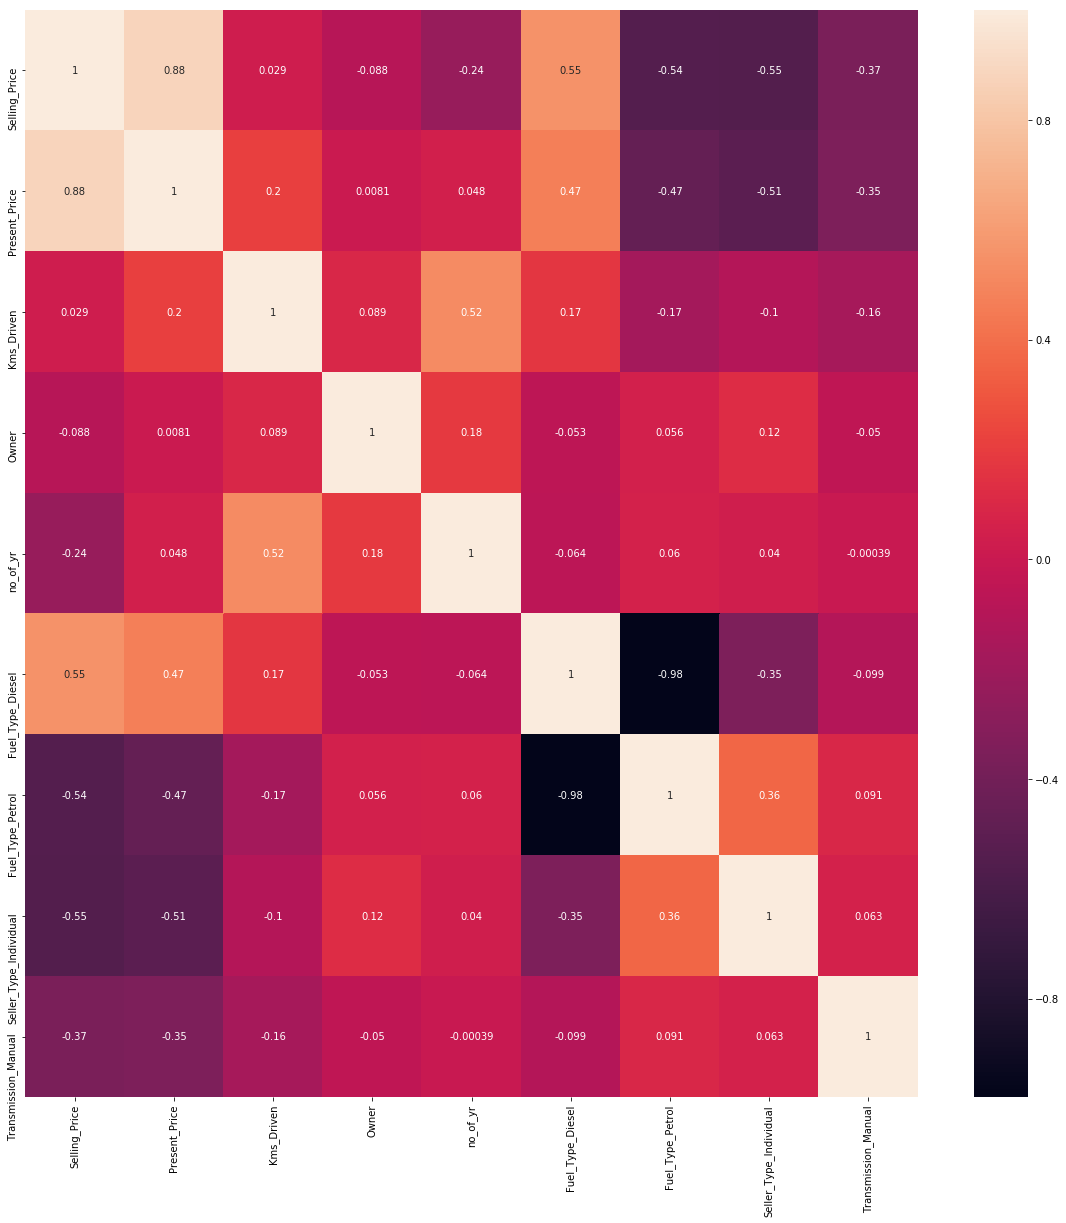

In [53]:
cormat = df.corr()
top_cor_feat = cormat.index
plt.figure(figsize = (20,20))

#ploting the dataset
g = sns.heatmap(df[top_cor_feat].corr(), annot=True)

In [64]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [65]:
y.head()
# x.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [67]:
## feature importance
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x, y)

ExtraTreesRegressor()

In [68]:
print(model.feature_importances_)

[0.34781441 0.04211949 0.00035885 0.07335086 0.24751826 0.00719739
 0.12697505 0.1546657 ]


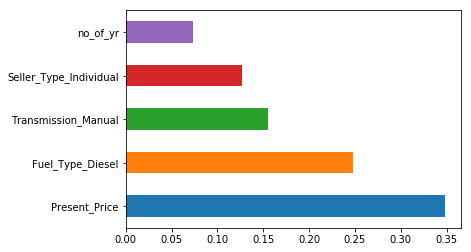

In [70]:
#plot graph of importance feature for better visualize
feat_imp = pd.Series(model.feature_importances_, index = x.columns)
feat_imp.nlargest(5).plot(kind = 'barh')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [73]:
x_train.shape

(240, 8)

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
# have to play with parameters , otherwise its led to overfit or underfit
# with hyper-parameter tuning

In [109]:
# Hyperparameters

# numbers of tree in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of feature to consider at every split
max_features = ['auto', 'sqrt']

# max-number level of tree
max_dept = [int(x) for x in np.linspace(5, 30, num = 6)]

# minimum number of sample reg to split a node 
min_sample_split = [2,5,10,50,100]

# minimum numbers of samples req at each leaf node
min_sample_leaf = [1,2,5,10]

In [116]:
# create the random grid
random_gric = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_dept,
               'min_samples_split':min_sample_split,
               'min_samples_leaf':min_sample_leaf}
print(random_gric)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 50, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [117]:
# use the random grid to search best hyperparameters
# first create the base model to tune
# help us to find best parameters out of all given parameters
# randomizesearch cv fast than gridsearch cv
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_gric, scoring = 'neg_mean_squared_error', n_iter = 10,cv = 5, verbose= 2, random_state=42, n_jobs=1)

In [118]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=50, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [119]:
prediction = rf_random.predict(x_test)

In [120]:
prediction

array([ 3.7265 , 20.65338,  2.72942,  2.31223,  4.8528 ,  0.39023,
        7.7122 ,  4.1744 ,  2.52174,  0.46197,  5.27308,  0.91937,
       22.11095,  1.11528,  4.6858 ,  7.24955,  0.24884,  3.67511,
        0.34338,  8.70084,  5.37018,  4.4034 ,  1.2526 ,  0.50417,
        6.25934,  5.84211,  5.15228,  0.84583,  4.1215 ,  5.62536,
        0.55105,  7.2808 ,  4.39802,  8.70084,  4.67931,  0.53325,
        0.44684,  9.72662,  0.45673,  2.85003,  0.46374,  2.42491,
        8.29802,  6.31052,  3.03207,  7.23195,  7.3906 ,  5.52655,
        3.76343,  0.58738, 12.01439,  0.91638,  2.84821,  2.48829,
        4.43185, 20.70751,  5.38945,  0.56455,  3.05609,  0.53064,
        1.1731 ])

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


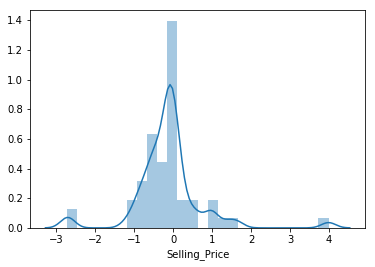

In [122]:
sns.distplot(y_test-prediction)

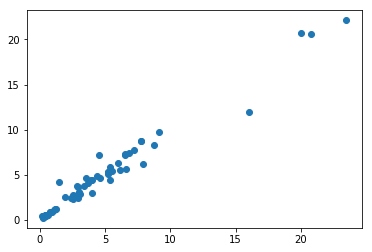

In [125]:
plt.scatter(y_test, prediction)

In [127]:
import pickle

file = open('random_forest_regression_model.pkl', 'wb')
  
pickle.dump(rf_random, file)